## Import Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

Load CIFAR

In [3]:
from tensorflow.keras.datasets import cifar10
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

In [4]:
print(train_images.shape)
print(train_labels.shape)

(50000, 32, 32, 3)
(50000, 1)


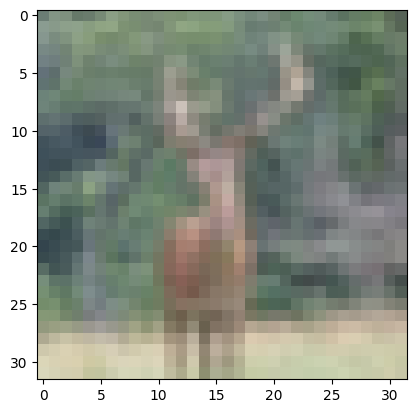

In [5]:
n = np.random.randint(1, 1000)
pixels = train_images[n,:,:,:]

plt.imshow(pixels)
plt.show()

In [6]:
print(train_labels[n])

[4]


In [7]:
print(train_images.min())
train_images.max()

0


255

In [8]:
train_images = train_images.astype('float32')
test_images= test_images.astype('float32')
# normalize to range 0-1
train_images= train_images / 255.0
test_images = test_images / 255.0

In [9]:
print(train_images.min())
train_images.max()

0.0


1.0

We need to make sure to one-hot encode the labels so there is no possibility of bias


In [10]:
print(np.unique(test_labels))
print(np.unique(train_labels))

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


In [11]:
encoder = OneHotEncoder(sparse=False)
train_enc = encoder.fit_transform(train_labels.reshape(-1, 1))
print(train_enc.shape)
print(train_enc[0:3,:])

(50000, 10)
[[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


In [12]:
test_enc = encoder.fit_transform(test_labels.reshape(-1, 1))
print(test_enc.shape)
print(test_enc[0:3,:])

(10000, 10)
[[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]]


Build CNN With 
- Convoltuional
- Pooling
- Flatten
- Dense

In [13]:
model_1CNN = tf.keras.models.Sequential([
tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(32,32,3)),
tf.keras.layers.MaxPooling2D(2, 2),
tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
tf.keras.layers.MaxPooling2D(2,2),
tf.keras.layers.Flatten(),
tf.keras.layers.Dense(128, activation='relu'),
tf.keras.layers.Dense(10, activation='softmax')
])

In [14]:
model_1CNN.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model_1CNN.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 64)        1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 2304)              0         
                                                                 
 dense (Dense)               (None, 128)               2

In [15]:
history = model_1CNN.fit(train_images, train_enc, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
1250/1250 [==============================] - 34s 27ms/step - loss: 1.4786 - accuracy: 0.4660 - val_loss: 1.2397 - val_accuracy: 0.5609
Epoch 2/10
1250/1250 [==============================] - 34s 27ms/step - loss: 1.1175 - accuracy: 0.6072 - val_loss: 1.0272 - val_accuracy: 0.6421
Epoch 3/10
1250/1250 [==============================] - 34s 27ms/step - loss: 0.9664 - accuracy: 0.6615 - val_loss: 0.9973 - val_accuracy: 0.6541
Epoch 4/10
1250/1250 [==============================] - 35s 28ms/step - loss: 0.8645 - accuracy: 0.6986 - val_loss: 0.9414 - val_accuracy: 0.6804
Epoch 5/10
1250/1250 [==============================] - 35s 28ms/step - loss: 0.7845 - accuracy: 0.7246 - val_loss: 0.9436 - val_accuracy: 0.6742
Epoch 6/10
1250/1250 [==============================] - 35s 28ms/step - loss: 0.7107 - accuracy: 0.7521 - val_loss: 0.9483 - val_accuracy: 0.6776
Epoch 7/10
1250/1250 [==============================] - 35s 28ms/step - loss: 0.6403 - accuracy: 0.7764 - val_loss: 0.9303 -

Train model and save weights

In [16]:
model_1CNN.save('Model1_CNN.h5') 

Evaluate loss, accuracy, recall, precision, and confusion

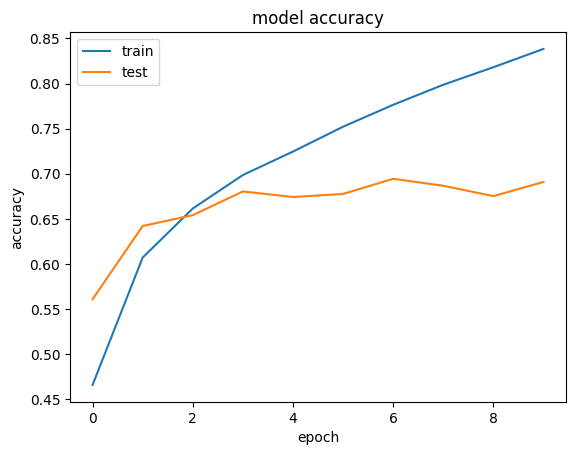

In [17]:
# Visualize Model Training History
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


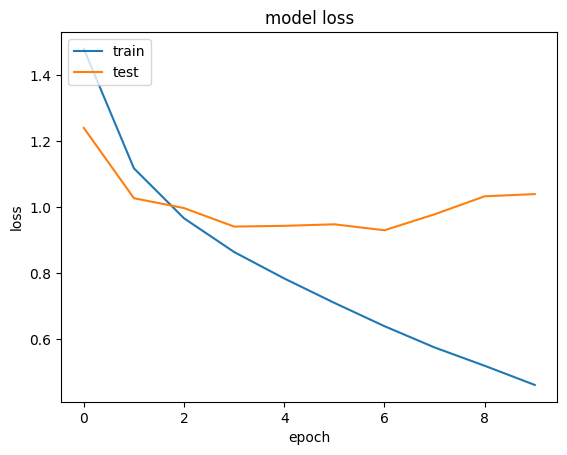

In [18]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [63]:
test_loss, test_accuracy = model_1CNN.evaluate(test_images, test_enc)

313/313 [==============================] - 2s 6ms/step - loss: 1.0604 - accuracy: 0.6898


In [64]:
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

Test Loss: 1.0603519678115845
Test Accuracy: 0.6898000240325928


In [21]:
predictions = model_1CNN.predict(test_images)
print(predictions.shape, test_enc.shape)

313/313 [==============================] - 2s 6ms/step
(10000, 10) (10000, 10)


In [22]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report

cm = confusion_matrix(test_labels, np.argmax(predictions, axis=1))
print(cm)


[[797  13  37  16  21   5   7  15  54  35]
 [ 27 799   9  13   6   6   7   9  36  88]
 [ 89   7 524  62  94  98  49  51  16  10]
 [ 28  19  53 419  72 240  69  70  15  15]
 [ 25   4  57  57 602  72  26 136  15   6]
 [ 21   4  40 131  27 666  16  78   9   8]
 [  7   9  43  60  43  47 760  16   2  13]
 [ 18   4  23  21  36  73   7 811   2   5]
 [ 75  39  14  12  13  14   8  14 788  23]
 [ 52 108  13  12   7   9  11  25  31 732]]


Visualize Feature Maps

In [23]:
import matplotlib.pyplot as plt
from tensorflow.keras import models
layer_outputs = [layer.output for layer in model_1CNN.layers]
activation_model = tf.keras.models.Model(inputs = model_1CNN.input, outputs = layer_outputs)
boat_list = [i for i in range(len(train_images)) if train_labels[i] == 8]
print(len(boat_list))
print(boat_list[0:10])
train_labels[boat_list[0:10]]

5000
[8, 62, 69, 92, 100, 106, 111, 135, 139, 155]


array([[8],
       [8],
       [8],
       [8],
       [8],
       [8],
       [8],
       [8],
       [8],
       [8]], dtype=uint8)

1/1 [==============================] - 0s 18ms/step


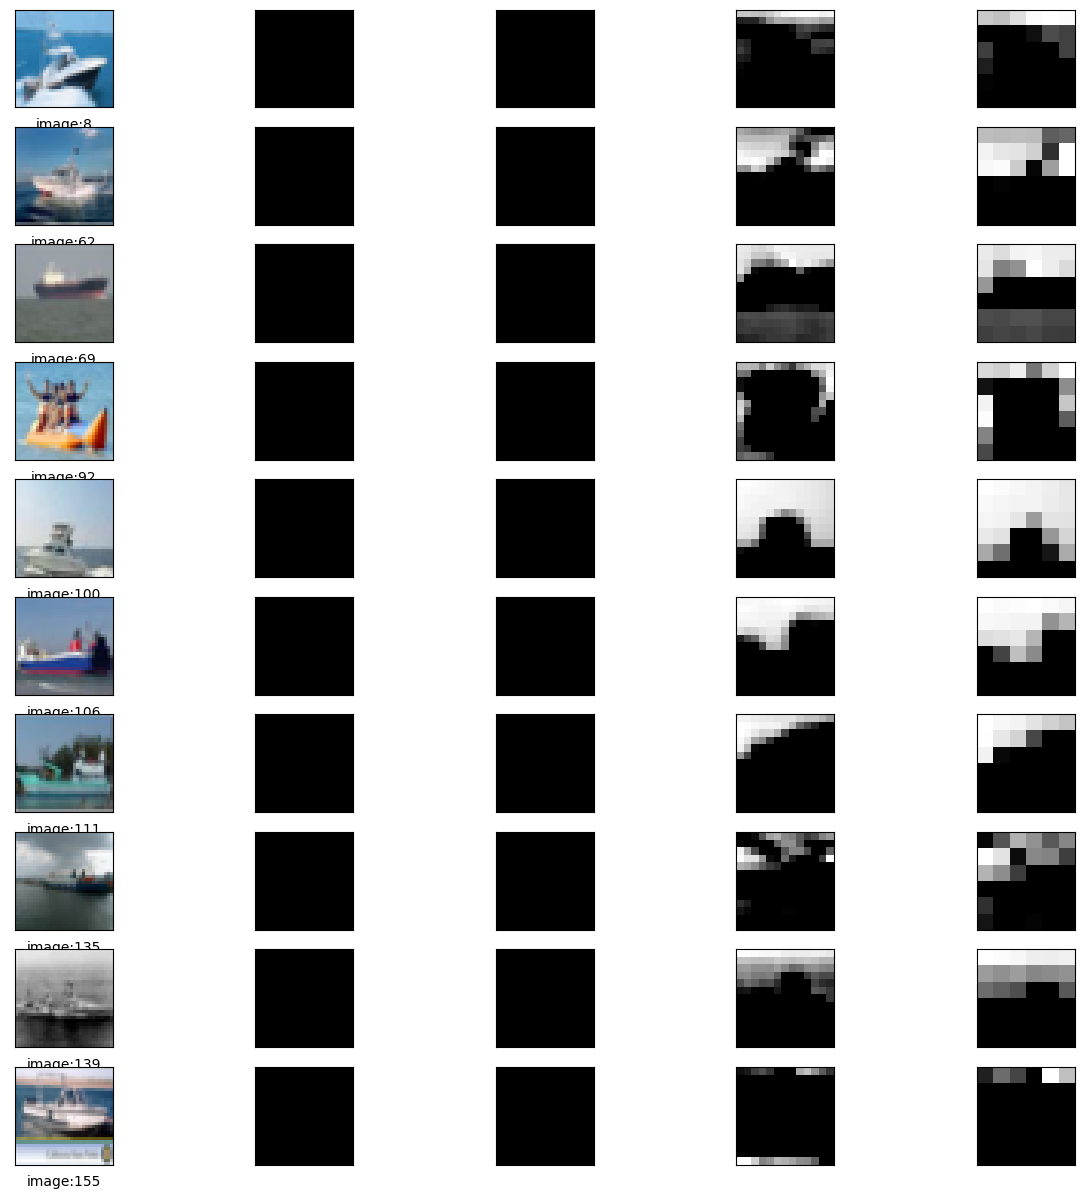

In [24]:
%matplotlib inline
import numpy as np
np.argmax(model_1CNN.predict(train_images[boat_list[0:10]]), axis=1)
f, ax = plt.subplots(10,5)
f.set_figheight(15)
f.set_figwidth(15)
plt.setp(ax, xticks=[], yticks=[])
for idx, k in enumerate(boat_list[0:10]):
    ax[idx,0].imshow(train_images[k], cmap='gray')
    ax[idx,0].set_xlabel('image:'+str(k))
    for lay_ind in range(0,4):
        f = activation_model.predict(train_images[k].reshape(1, 32,32,3))[lay_ind]
        ax[idx,lay_ind+1].imshow(f[0, : , :, 1], cmap='gray')

5000
[9, 17, 21, 26, 33, 36, 38, 39, 59, 74]
1/1 [==============================] - 0s 21ms/step


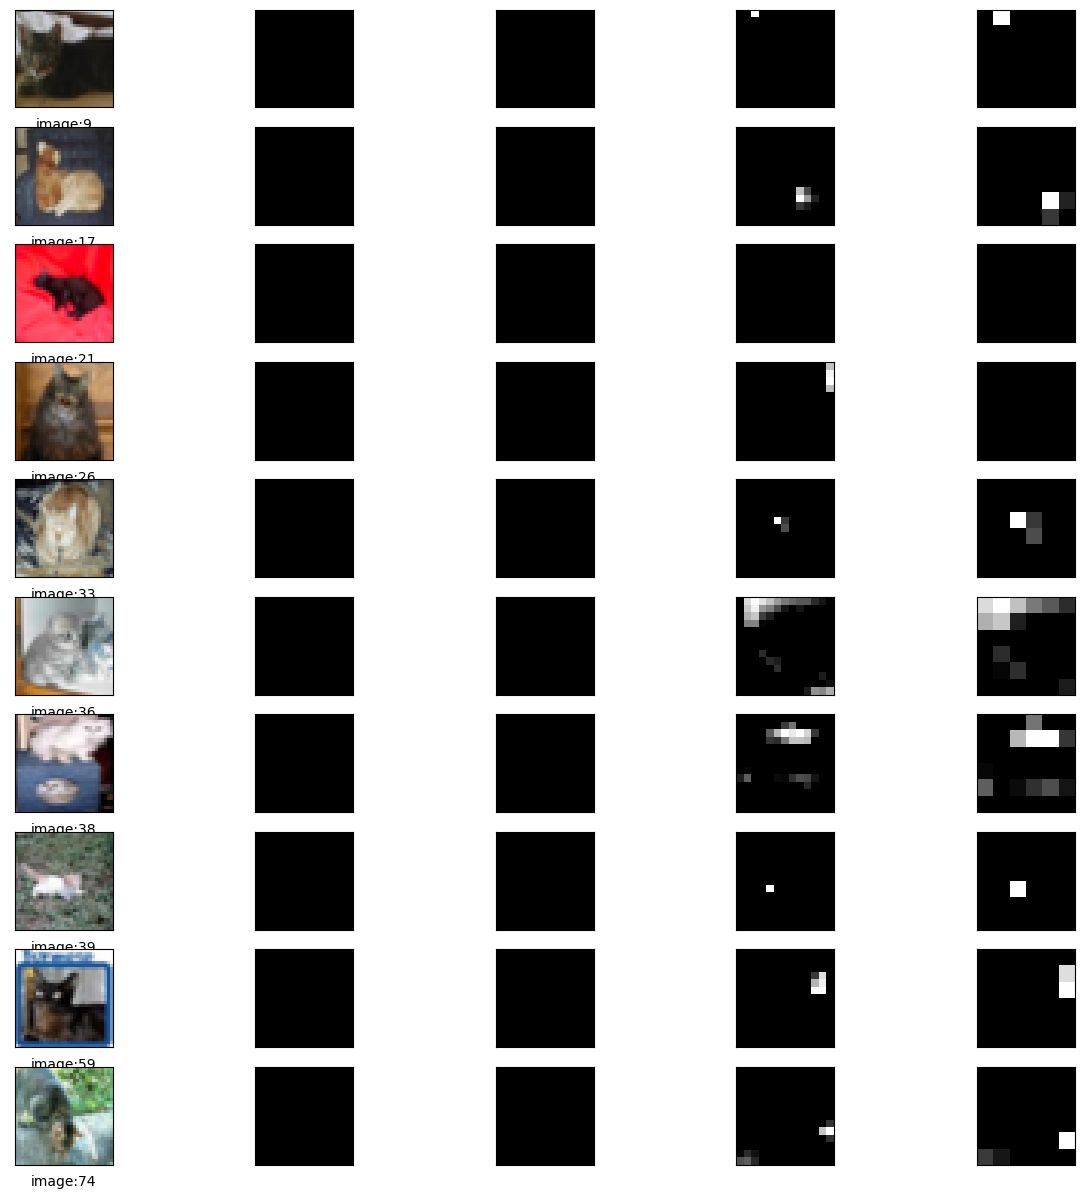

In [25]:
layer_outputs = [layer.output for layer in model_1CNN.layers]
activation_model = tf.keras.models.Model(inputs = model_1CNN.input, outputs = layer_outputs)
cat_list = [i for i in range(len(train_images)) if train_labels[i] == 3]
print(len(cat_list))
print(cat_list[0:10])
train_labels[cat_list[0:10]]

np.argmax(model_1CNN.predict(train_images[cat_list[0:10]]), axis=1)
f, ax = plt.subplots(10,5)
f.set_figheight(15)
f.set_figwidth(15)
plt.setp(ax, xticks=[], yticks=[])
for idx, k in enumerate(cat_list[0:10]):
    ax[idx,0].imshow(train_images[k], cmap='gray')
    ax[idx,0].set_xlabel('image:'+str(k))
    for lay_ind in range(0,4):
        f = activation_model.predict(train_images[k].reshape(1, 32,32,3))[lay_ind]
        ax[idx,lay_ind+1].imshow(f[0, : , :, 1], cmap='gray')

# Create Dense Model and train

In [37]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
keras.backend.clear_session()

In [38]:
Model2_Dense = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(32,32,3)),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
     tf.keras.layers.Dense(128, activation='relu'),
     tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [39]:
Model2_Dense.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
Model2_Dense.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 3072)              0         
                                                                 
 dense (Dense)               (None, 512)               1573376   
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 dense_3 (Dense)             (None, 64)                8256      
                                                                 
 dense_4 (Dense)             (None, 10)                650       
                                                                 
Total params: 1,746,506
Trainable params: 1,746,506
Non-

In [41]:
history2 = Model2_Dense.fit(train_images, train_enc, epochs=10,batch_size=32, validation_split=0.2)

Epoch 1/10
1250/1250 [==============================] - 13s 10ms/step - loss: 1.9105 - accuracy: 0.3016 - val_loss: 1.8067 - val_accuracy: 0.3459
Epoch 2/10
1250/1250 [==============================] - 12s 10ms/step - loss: 1.7330 - accuracy: 0.3756 - val_loss: 1.6729 - val_accuracy: 0.3925
Epoch 3/10
1250/1250 [==============================] - 12s 10ms/step - loss: 1.6494 - accuracy: 0.4062 - val_loss: 1.6388 - val_accuracy: 0.4158
Epoch 4/10
1250/1250 [==============================] - 12s 10ms/step - loss: 1.5961 - accuracy: 0.4259 - val_loss: 1.5953 - val_accuracy: 0.4297
Epoch 5/10
1250/1250 [==============================] - 13s 10ms/step - loss: 1.5469 - accuracy: 0.4441 - val_loss: 1.5813 - val_accuracy: 0.4430
Epoch 6/10
1250/1250 [==============================] - 13s 10ms/step - loss: 1.5102 - accuracy: 0.4581 - val_loss: 1.5986 - val_accuracy: 0.4285
Epoch 7/10
1250/1250 [==============================] - 12s 10ms/step - loss: 1.4808 - accuracy: 0.4689 - val_loss: 1.5961 -

Save model and evaluate

In [52]:
model_1CNN.save('Model2_Dense.h5') 

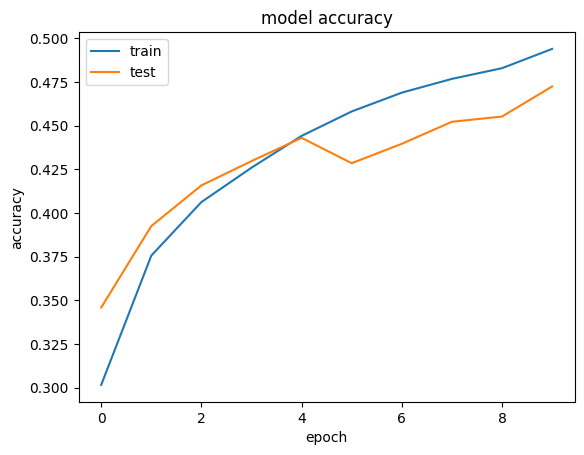

In [53]:
# Visualize Model Training History
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

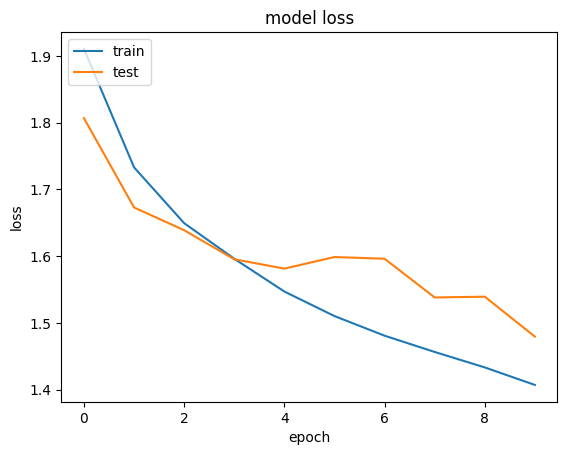

In [54]:
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [58]:
test_loss, test_accuracy = Model2_Dense.evaluate(test_images, test_enc)

print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)


313/313 [==============================] - 1s 3ms/step - loss: 1.4537 - accuracy: 0.4819
Test Loss: 1.4536561965942383
Test Accuracy: 0.48190000653266907


In [59]:
predictions = Model2_Dense.predict(test_images)
print(predictions.shape, test_enc.shape)

cm = confusion_matrix(test_labels, np.argmax(predictions, axis=1))
print(cm)


313/313 [==============================] - 1s 3ms/step
(10000, 10) (10000, 10)
[[558  41  64  20  32  14  37  24 147  63]
 [ 38 563  15  21  10  21  14  20  68 230]
 [ 83  33 409  72 114  54 135  49  30  21]
 [ 25  23 119 248  47 198 210  36  37  57]
 [ 56  11 208  60 367  35 157  55  26  25]
 [ 17  17 136 169  57 348 128  55  42  31]
 [  8  13 127  53  86  50 606  18  15  24]
 [ 38  28  87  71  97  57  56 473  17  76]
 [102  55  16  26  18  22  19   9 637  96]
 [ 43 131  10  33  11  21  36  39  66 610]]


# CNN vs Dense Results

Accuracy during Training:

    - CNN - 0.8383
    - Dense - 0.4939
    
Accuracy during Testing:

    - CNN Test Accuracy: 0.6898000240325928
    - Dense Test Accuracy: 0.48190000653266907
    
Advantages 

    - CNN - accuracy, robustness
    - Dense - training time, simplicity
    
Limitations

    - CNN - long training time, more nuance architecture, still prone to overfitting
    
    - Dense - overfitting, more epochs do not improve

Adjust CNN by adding another convolutional pooling

In [60]:
model_2CNN = tf.keras.models.Sequential([
tf.keras.layers.Conv2D(128, (3,3), activation='relu', input_shape=(32,32,3)),
tf.keras.layers.MaxPooling2D(2, 2),
tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
tf.keras.layers.MaxPooling2D(2,2),
tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
tf.keras.layers.MaxPooling2D(2,2),
tf.keras.layers.Flatten(),
tf.keras.layers.Dense(128, activation='relu'),
tf.keras.layers.Dense(10, activation='softmax')
])


In [61]:
model_2CNN.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model_2CNN.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 30, 30, 128)       3584      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 15, 15, 128)      0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 13, 13, 64)        73792     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 2, 2, 64)        

In [62]:
history3 = model_2CNN.fit(train_images, train_enc, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
1250/1250 [==============================] - 69s 55ms/step - loss: 1.6287 - accuracy: 0.4025 - val_loss: 1.3867 - val_accuracy: 0.4926
Epoch 2/10
1250/1250 [==============================] - 67s 53ms/step - loss: 1.2714 - accuracy: 0.5440 - val_loss: 1.1557 - val_accuracy: 0.5940
Epoch 3/10
1250/1250 [==============================] - 68s 54ms/step - loss: 1.1147 - accuracy: 0.6039 - val_loss: 1.0706 - val_accuracy: 0.6223
Epoch 4/10
1250/1250 [==============================] - 70s 56ms/step - loss: 1.0179 - accuracy: 0.6384 - val_loss: 1.0641 - val_accuracy: 0.6241
Epoch 5/10
1250/1250 [==============================] - 64s 51ms/step - loss: 0.9409 - accuracy: 0.6683 - val_loss: 1.0004 - val_accuracy: 0.6527
Epoch 6/10
1250/1250 [==============================] - 63s 50ms/step - loss: 0.8804 - accuracy: 0.6910 - val_loss: 0.9904 - val_accuracy: 0.6542
Epoch 7/10
1250/1250 [==============================] - 63s 51ms/step - loss: 0.8246 - accuracy: 0.7093 - val_loss: 0.9607 -

In [65]:
model_2CNN.save('model_2CNN.h5') 

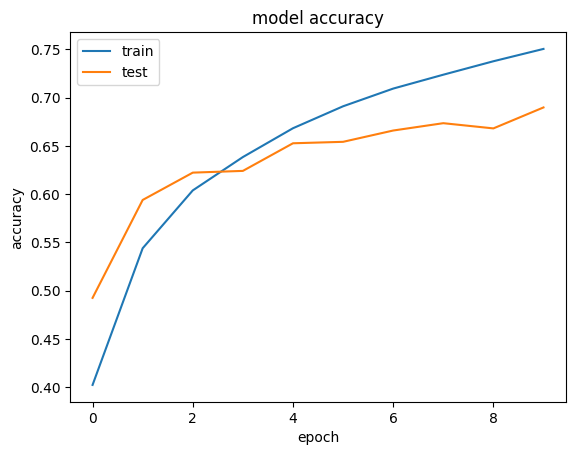

In [66]:
# Visualize Model Training History
plt.plot(history3.history['accuracy'])
plt.plot(history3.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

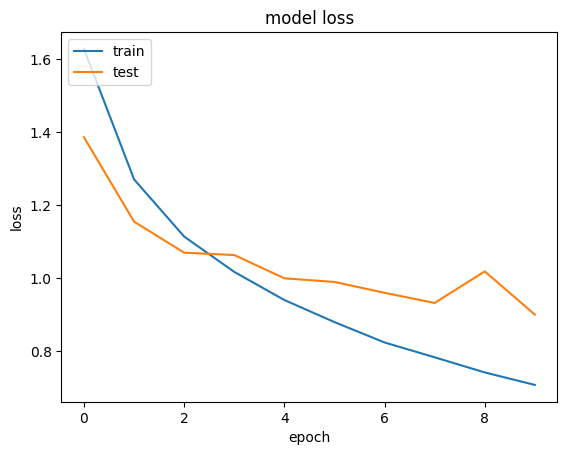

In [67]:
plt.plot(history3.history['loss'])
plt.plot(history3.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [68]:
test_loss, test_accuracy = model_2CNN.evaluate(test_images, test_enc)

print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)


313/313 [==============================] - 3s 10ms/step - loss: 0.8862 - accuracy: 0.6997
Test Loss: 0.8861519694328308
Test Accuracy: 0.6996999979019165


In [69]:
predictions = model_2CNN.predict(test_images)
print(predictions.shape, test_enc.shape)

cm = confusion_matrix(test_labels, np.argmax(predictions, axis=1))
print(cm)


313/313 [==============================] - 3s 10ms/step
(10000, 10) (10000, 10)
[[721  12  41  19  22   6   8   8 120  43]
 [ 23 789  17   9   3   0   9   2  39 109]
 [ 80   4 615  79  61  56  51  22  22  10]
 [ 23   9  85 544  60 136  46  33  26  38]
 [ 15   4  97  74 639  27  44  69  23   8]
 [ 14   8  98 175  44 576  17  36  15  17]
 [  8   5  58  92  32  17 762   6   9  11]
 [ 25   1  63  52  69  76   2 678  10  24]
 [ 53  24  10  14   3   4   5   4 858  25]
 [ 28  57   9  16   3   2  12   6  52 815]]


In [70]:
import matplotlib.pyplot as plt
from tensorflow.keras import models
layer_outputs = [layer.output for layer in model_2CNN.layers]
activation_model = tf.keras.models.Model(inputs = model_2CNN.input, outputs = layer_outputs)
boat_list = [i for i in range(len(train_images)) if train_labels[i] == 8]
print(len(boat_list))
print(boat_list[0:10])
train_labels[boat_list[0:10]]

5000
[8, 62, 69, 92, 100, 106, 111, 135, 139, 155]


array([[8],
       [8],
       [8],
       [8],
       [8],
       [8],
       [8],
       [8],
       [8],
       [8]], dtype=uint8)

1/1 [==============================] - 0s 19ms/step


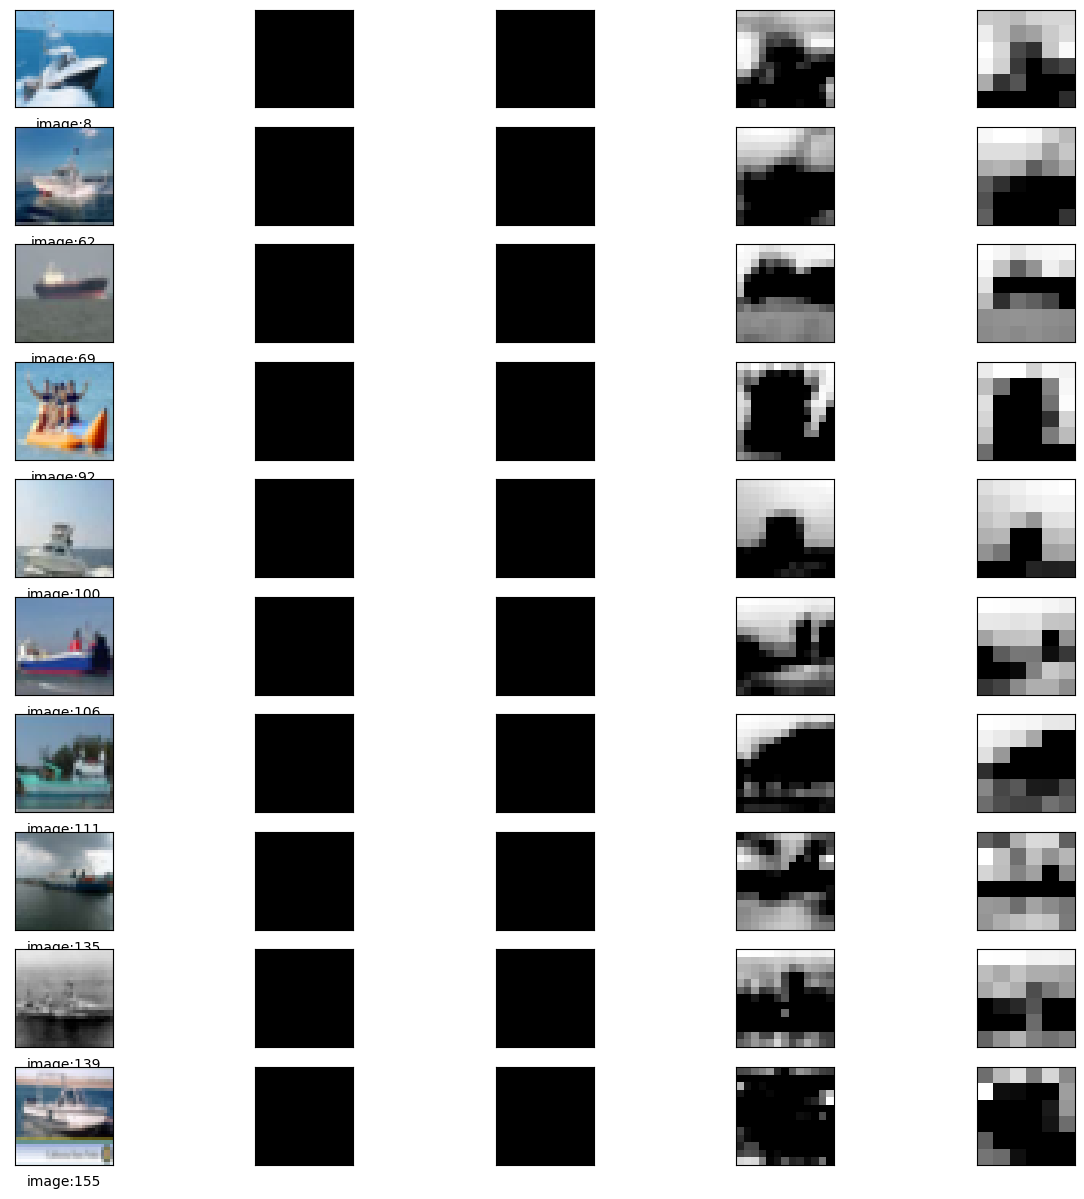

In [71]:
%matplotlib inline
import numpy as np
np.argmax(model_2CNN.predict(train_images[boat_list[0:10]]), axis=1)
f, ax = plt.subplots(10,5)
f.set_figheight(15)
f.set_figwidth(15)
plt.setp(ax, xticks=[], yticks=[])
for idx, k in enumerate(boat_list[0:10]):
    ax[idx,0].imshow(train_images[k], cmap='gray')
    ax[idx,0].set_xlabel('image:'+str(k))
    for lay_ind in range(0,4):
        f = activation_model.predict(train_images[k].reshape(1, 32,32,3))[lay_ind]
        ax[idx,lay_ind+1].imshow(f[0, : , :, 1], cmap='gray')

5000
[9, 17, 21, 26, 33, 36, 38, 39, 59, 74]
1/1 [==============================] - 0s 17ms/step


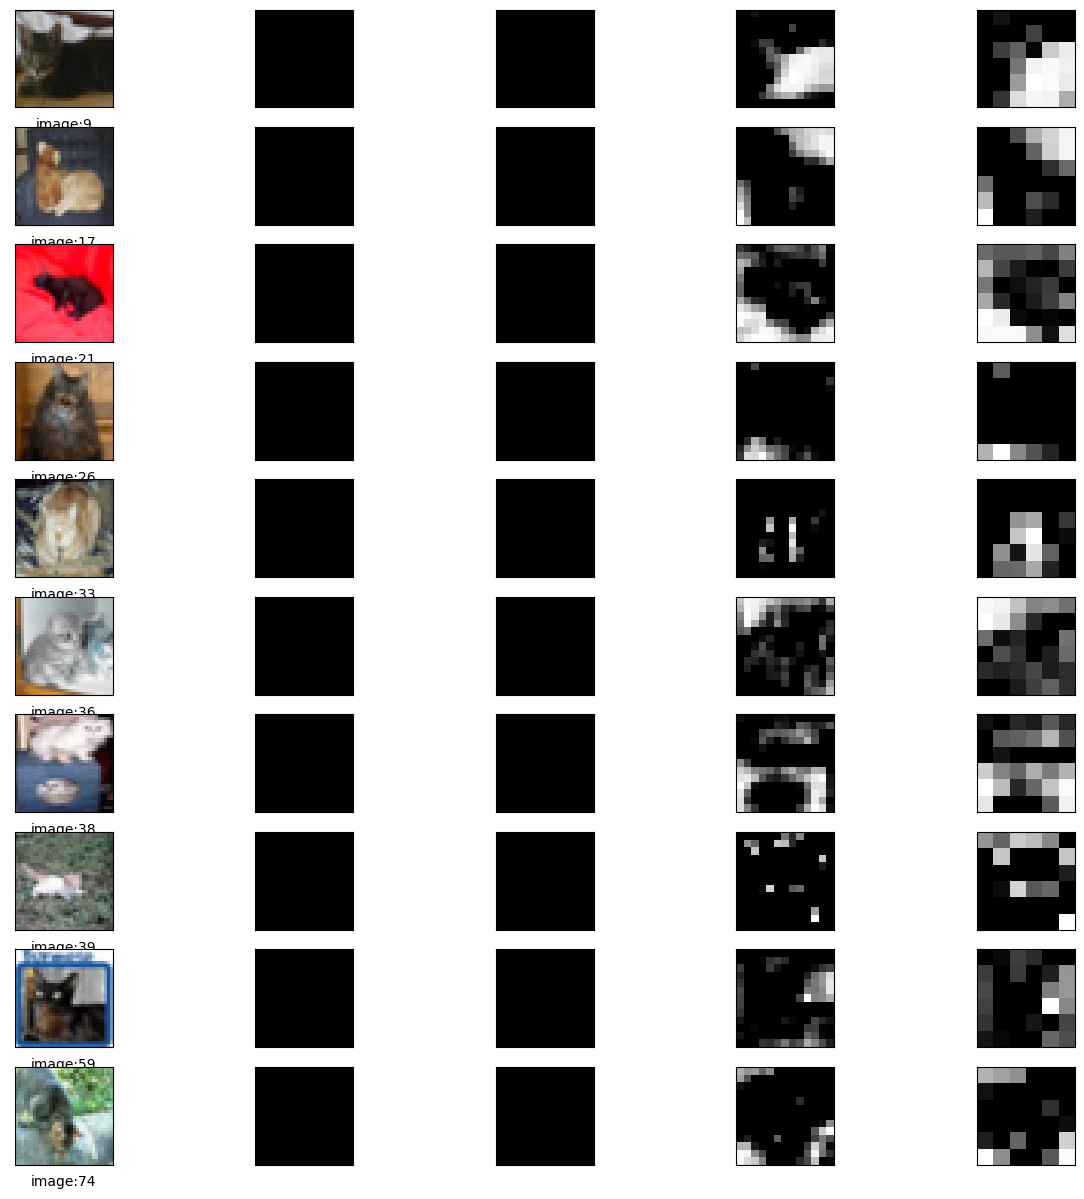

In [72]:
layer_outputs = [layer.output for layer in model_2CNN.layers]
activation_model = tf.keras.models.Model(inputs = model_2CNN.input, outputs = layer_outputs)
cat_list = [i for i in range(len(train_images)) if train_labels[i] == 3]
print(len(cat_list))
print(cat_list[0:10])
train_labels[cat_list[0:10]]

np.argmax(model_1CNN.predict(train_images[cat_list[0:10]]), axis=1)
f, ax = plt.subplots(10,5)
f.set_figheight(15)
f.set_figwidth(15)
plt.setp(ax, xticks=[], yticks=[])
for idx, k in enumerate(cat_list[0:10]):
    ax[idx,0].imshow(train_images[k], cmap='gray')
    ax[idx,0].set_xlabel('image:'+str(k))
    for lay_ind in range(0,4):
        f = activation_model.predict(train_images[k].reshape(1, 32,32,3))[lay_ind]
        ax[idx,lay_ind+1].imshow(f[0, : , :, 1], cmap='gray')

# Evaluate Original CNN, Adjusted CNN, and Dense

- Model 1
    - Test Loss: 1.0603519678115845
    - Test Accuracy: 0.6898000240325928


- Dense
    - Test Loss: 1.4536561965942383
    - Test Accuracy: 0.48190000653266907

- Model 2
    - Test Loss: 0.8861519694328308
    - Test Accuracy: 0.6996999979019165